In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# For data management
import pandas as pd
import numpy as np
import pickle

from sklearn import svm
from sklearn import metrics

from sklearn.model_selection import train_test_split

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
# %cd /content/drive/MyDrive/Face-Mask-Dataset/

%cd /content/drive/MyDrive/data-face-mask/Face-Mask-Dataset

/content/drive/MyDrive/data-face-mask/Face-Mask-Dataset


In [ ]:
pickle_in = open("X_test_bias.pickle", "rb")
X_test_bias = pickle.load(pickle_in)
pickle_in = open("y_test_bias.pickle", "rb")
y_test_bias = pickle.load(pickle_in)

In [ ]:
#load models
pickle_in = open("SVM_50.pickle", "rb")
model_50 = pickle.load(pickle_in)

# TEST BIAS

## Model trained with 50% dataset

In [ ]:
# xử lý đầu vào cho model SVM
nsamples, nx, ny = X_test_bias.shape
X_test_bias = X_test_bias.reshape((nsamples,nx*ny))

In [ ]:
y_pred = model_50.predict(X_test_bias)
accuracy = model_50.score(X_test_bias, y_test_bias)

In [ ]:
print(metrics.classification_report(y_test_bias, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.03      0.05       152
           1       0.29      0.32      0.31       144
           2       0.45      0.73      0.56       213

    accuracy                           0.40       509
   macro avg       0.40      0.36      0.31       509
weighted avg       0.41      0.40      0.34       509



Text(0.5, 1.0, 'Accuracy Score: 0.40471512770137524')

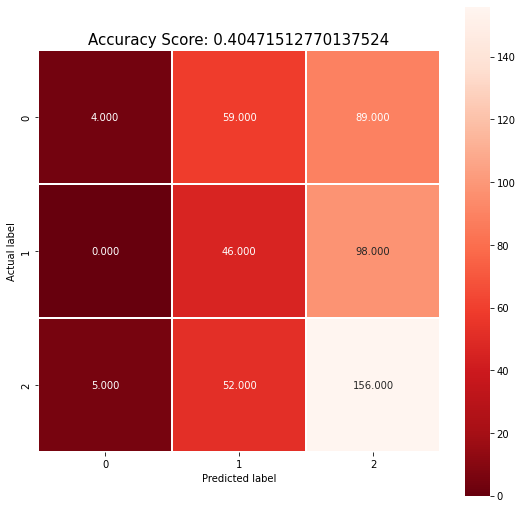

In [ ]:
cm = confusion_matrix(y_test_bias, y_pred)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_true=y_test_bias, y_pred=y_pred))
plt.title(all_sample_title,size=15)